## Lending Club Case Study

### Objective:
EDA on loan dataset to analyse factors predominant in defaulting loan repayment

#### Problem Statement:

A consumer finance company that lends different loans to urban customers wants to be able to assess the risks related to granting loan to a customer.

Based on `risk assessment` company should be able to identify and `accept` or `reject` loan application.
1. How likely a person is to default a loan and is a bad candidate to grant loan
2. If a person is high risk then should the interest rate be increased
3. Is the customer a good candidate to lend

#### GOAL

**Reduce `credit loss` for the company by evaluating the `driving factors/ variables` for defaulting loan repayment**

---
#### Steps

1. Understand Data
2. Data cleaning - remove outliers, null values, fix data types
3. Data Analysis - Univariate, Bivariate, Multivariate
4. Visualise results
5. Conclusion

---

##### Import Libraries

In [1]:
#Load the necessary Libraries
import pandas as pd
import numpy as np
# Charts and plots
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
# Warnings library
import warnings #warning
warnings.filterwarnings('ignore')


#Removing display limit of dataframe (optional cell to run)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

### Load Data

In [2]:
# Load Data
loan = pd.read_csv('loan.csv')
data_dict = pd.read_excel('Data_Dictionary.xlsx')

# loan.head()

In [3]:
# Shape of dataset
loan.shape

(39717, 111)

In [4]:
# Data types of all columns
loan.dtypes

id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state                        

### Cleanup Data

Clean null values, unused columns

In [5]:
# Check null values
loan.isnull().sum().sort_values(ascending=False)

verification_status_joint         39717
annual_inc_joint                  39717
mo_sin_old_rev_tl_op              39717
mo_sin_old_il_acct                39717
bc_util                           39717
bc_open_to_buy                    39717
avg_cur_bal                       39717
acc_open_past_24mths              39717
inq_last_12m                      39717
total_cu_tl                       39717
inq_fi                            39717
total_rev_hi_lim                  39717
all_util                          39717
max_bal_bc                        39717
open_rv_24m                       39717
open_rv_12m                       39717
il_util                           39717
total_bal_il                      39717
mths_since_rcnt_il                39717
open_il_24m                       39717
open_il_12m                       39717
open_il_6m                        39717
open_acc_6m                       39717
tot_cur_bal                       39717
tot_coll_amt                      39717


In [6]:
# Remove columns with all null values

loan = loan.loc[:, ~loan.isnull().all()]
print(loan.shape)

print(loan.isnull().sum().sort_values(ascending=False))

(39717, 57)
next_pymnt_d                  38577
mths_since_last_record        36931
mths_since_last_delinq        25682
desc                          12942
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
chargeoff_within_12_mths         56
collections_12_mths_ex_med       56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
home_ownership                    0
int_rate                          0
out_prncp_inv                     0
total_pymnt                       0
total_pymnt_inv                   0
total_rec_prncp                   0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
collection_recovery_fee           0
term                              0
last_pymnt_amnt                   0
initial_list_status               0
funded_amnt_inv 

In [7]:
# Remove columns with more than 60% null values

loan = loan.loc[:, ~((loan.isnull().sum()/loan.shape[0])*100 > 60.0)]
print(loan.shape)

print(loan.isnull().sum().sort_values(ascending=False))

(39717, 54)
desc                          12942
emp_title                      2459
emp_length                     1075
pub_rec_bankruptcies            697
last_pymnt_d                     71
collections_12_mths_ex_med       56
chargeoff_within_12_mths         56
revol_util                       50
tax_liens                        39
title                            11
last_credit_pull_d                2
total_rec_prncp                   0
out_prncp                         0
initial_list_status               0
out_prncp_inv                     0
total_acc                         0
total_pymnt                       0
total_pymnt_inv                   0
collection_recovery_fee           0
total_rec_int                     0
total_rec_late_fee                0
recoveries                        0
pub_rec                           0
last_pymnt_amnt                   0
policy_code                       0
application_type                  0
acc_now_delinq                    0
delinq_amnt     

In [8]:
# Shape after cleaning null values
loan.shape

(39717, 54)

In [9]:
## Remove non unique columns that only have 1 unique value
loan = loan.loc[:, ~(loan.nunique() == 1)]

loan.shape

(39717, 45)

In [10]:
loan.nunique().sort_values(ascending=True)

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
last_pymnt_d                 101
last_credit_pull_d           106
int_rate                     371
earliest_cr_line             526
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
out_prncp_inv               1138
total_rec_late_fee          1356
collection_recovery_fee     2616
dti                         2868
recoveries                  4040
annual_inc

In [11]:
## Remove columns
# id: redundant column to member_id
# url, desc, earliest_cr_line, revol_bal, title, emp_title, collection_recovery_fee: not required for credit loss analysis
# zip_code: masked therefore cannot be of help in analysis

loan = loan.drop(['id', 'url', 'desc', 'earliest_cr_line', 'revol_bal', 'title', 'emp_title', 'zip_code', 'collection_recovery_fee', 'last_pymnt_d', 'last_credit_pull_d'], axis=1)
loan.shape

(39717, 34)

In [12]:
## Removing extra strings and convert to appropriate datatypes

loan['term'] = loan['term'].apply(lambda x: int(x.replace(' months', '')))
loan['int_rate'] = loan['int_rate'].apply(lambda x: float(x.replace('%', '')))
loan['revol_util'] = loan['revol_util'].apply(lambda x: float(str(x).replace('%', '')))

# Assuming '< 1 year' as 0.7 and converting to float values
loan['emp_length'] = loan['emp_length'].str.replace('< 1', '0.7').replace('[$a-zA-Z+]', '', regex=True).astype('float')

# Change column type to category
for col in ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state']:
    loan[col] = loan[col].astype('category')

# Change column type to datetime
loan['issue_d'] = pd.to_datetime(loan['issue_d'],format='%b-%y')
loan['issue_d_month'] = pd.to_datetime(loan['issue_d'],format='%b-%y').dt.month
loan['issue_d_year'] = pd.to_datetime(loan['issue_d'],format='%b-%y').dt.year

loan.dtypes

member_id                        int64
loan_amnt                        int64
funded_amnt                      int64
funded_amnt_inv                float64
term                             int64
int_rate                       float64
installment                    float64
grade                         category
sub_grade                     category
emp_length                     float64
home_ownership                category
annual_inc                     float64
verification_status           category
issue_d                 datetime64[ns]
loan_status                   category
purpose                       category
addr_state                    category
dti                            float64
delinq_2yrs                      int64
inq_last_6mths                   int64
open_acc                         int64
pub_rec                          int64
revol_util                     float64
total_acc                        int64
out_prncp                      float64
out_prncp_inv            

In [13]:
# Round all float types to 2 decimals

for cols in loan.columns:
    if(loan[cols].dtype == 'float64'):
        loan[cols] = loan[cols].round(2)

In [14]:
loan.head(10)

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_month,issue_d_year
0,1296599,5000,5000,4975.0,36,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0,1,3,0,83.7,9,0.00,0.00,5863.16,5833.84,5000.00,863.16,0.00,0.00,171.62,0.0,12,2011
1,1314167,2500,2500,2500.0,60,15.27,59.83,C,C4,0.7,RENT,30000.0,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0,5,3,0,9.4,4,0.00,0.00,1008.71,1008.71,456.46,435.17,0.00,117.08,119.66,0.0,12,2011
2,1313524,2400,2400,2400.0,36,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0,2,2,0,98.5,10,0.00,0.00,3005.67,3005.67,2400.00,605.67,0.00,0.00,649.91,0.0,12,2011
3,1277178,10000,10000,10000.0,36,13.49,339.31,C,C1,10.0,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0,1,10,0,21.0,37,0.00,0.00,12231.89,12231.89,10000.00,2214.92,16.97,0.00,357.48,0.0,12,2011
4,1311748,3000,3000,3000.0,60,12.69,67.79,B,B5,1.0,RENT,80000.0,Source Verified,2011-12-01,Current,other,OR,17.94,0,0,15,0,53.9,38,524.06,524.06,3513.33,3513.33,2475.94,1037.39,0.00,0.00,67.79,0.0,12,2011
5,1311441,5000,5000,5000.0,36,7.90,156.46,A,A4,3.0,RENT,36000.0,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0,3,9,0,28.3,12,0.00,0.00,5632.21,5632.21,5000.00,632.21,0.00,0.00,161.03,0.0,12,2011
6,1304742,7000,7000,7000.0,60,15.96,170.08,C,C5,8.0,RENT,47004.0,Not Verified,2011-12-01,Fully Paid,debt_consolidation,NC,23.51,0,1,7,0,85.6,11,0.00,0.00,10110.84,10110.84,6985.61,3125.23,0.00,0.00,1313.76,0.0,12,2011
7,1288686,3000,3000,3000.0,36,18.64,109.43,E,E1,9.0,RENT,48000.0,Source Verified,2011-12-01,Fully Paid,car,CA,5.35,0,2,4,0,87.5,4,0.00,0.00,3939.14,3939.14,3000.00,939.14,0.00,0.00,111.34,0.0,12,2011
8,1306957,5600,5600,5600.0,60,21.28,152.39,F,F2,4.0,OWN,40000.0,Source Verified,2011-12-01,Charged Off,small_business,CA,5.55,0,2,11,0,32.6,13,0.00,0.00,646.02,646.02,162.02,294.94,0.00,189.06,152.39,0.0,12,2011
9,1306721,5375,5375,5350.0,60,12.69,121.45,B,B5,0.7,RENT,15000.0,Verified,2011-12-01,Charged Off,other,TX,18.08,0,0,2,0,36.5,3,0.00,0.00,1476.19,1469.34,673.48,533.42,0.00,269.29,121.45,0.0,12,2011


---
### Finding and cleaning **Outliers**



Loan Amount Quantiles
0.50    10000.0
0.75    15000.0
0.90    22000.0
0.95    25000.0
0.97    30000.0
0.98    31468.0
0.99    35000.0
Name: loan_amnt, dtype: float64


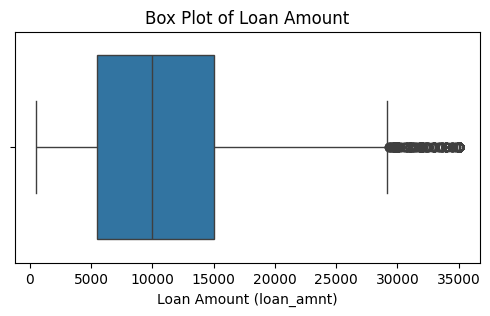


Interest Rate Quantiles
0.50    11.86
0.75    14.59
0.90    16.89
0.95    18.54
0.97    19.42
0.98    20.25
0.99    20.99
Name: int_rate, dtype: float64


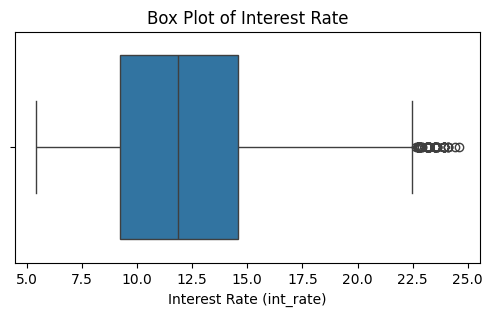


Annual Income Quantiles
0.50     59000.00
0.75     82300.00
0.90    116000.00
0.95    142000.00
0.97    165757.92
0.98    187000.00
0.99    234999.36
Name: annual_inc, dtype: float64


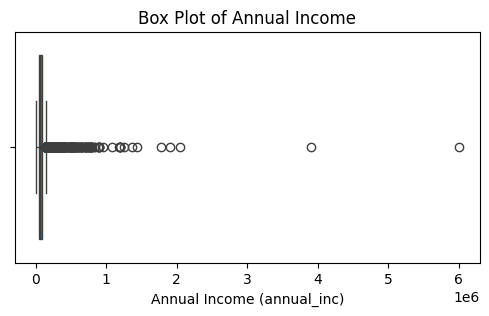


Debt to Income Ratio Quantiles
0.50    13.40
0.75    18.60
0.90    22.33
0.95    23.84
0.97    24.54
0.98    24.88
0.99    26.68
Name: dti, dtype: float64


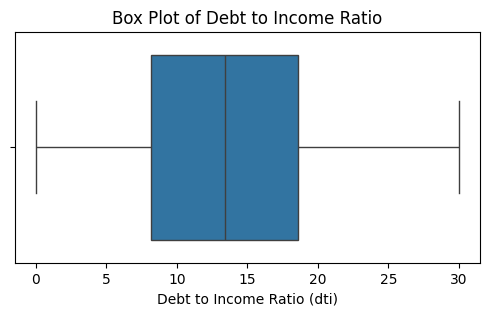

In [15]:
numerical_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti']
numerical_col_desc = {
    'loan_amnt': 'Loan Amount',
    'int_rate': 'Interest Rate',
    'annual_inc': 'Annual Income',
    'dti': 'Debt to Income Ratio'
}
for col in numerical_cols:
    quantile = loan[col].quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
    print('\n' + numerical_col_desc[col] + ' Quantiles')
    print(quantile)
    plt.figure(figsize=(6, 3))
    sns.boxplot(x=loan[col]).set(
        xlabel=numerical_col_desc[col] + ' (' +col+ ')'
    )
    plt.title(f'Box Plot of {numerical_col_desc[col]}')
    plt.show()

In [16]:
## Removing Outliers
# Annual Income starts increasing exponentially from 95 Percentile onwards, so they need to be removed
per_95_annual_inc = loan['annual_inc'].quantile(0.95)
loan = loan[loan['annual_inc']<=per_95_annual_inc]

loan.shape

(37743, 36)

### <font color=blue>Inference:</font>
**Based on boxplots Annual Income had the most outliers above 95 percentile and have been removed**

In [17]:
## Removing records with Current loan status, since they can/ cannot change to Fully Paid or Charged off
loan = loan[~(loan['loan_status']=='Current')]

loan.shape

(36689, 36)

### <font color=blue>Inference:</font>
**Records with 'Current' loan status cannot be considered in evaluation since they can either pay out fully or default loan**

### <font color=green>Univariate Analysis</font>

In [ ]:
numerical_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'term']

for col in numerical_cols:
    plt.figure(figsize=(10, 5))
    sns.distplot(sorted(loan[col]),kde=True,bins=20)
    plt.title(f'Distribution of {col}')
    plt.show()

### <font color=blue>Inference:</font>
<ul>
    <li><b>Loan Amount</b>: Most loans are small to moderate amounts with a few large loans.</li>
    <li><b>Interest Rate</b>: Interest rates vary, but there might be common rates around certain values.</li>
    <li><b>Annual Income</b>: Most borrowers have moderate incomes; a few have very high incomes.</li>
    <li><b>Debt-to-Income Ratio</b>: Most borrowers have a manageable Debt To Income ratio, but some might have higher values indicating more debt.</li>
    <li><b>Term</b>: A significant proportion of loans are of term 36months</li>
</ul>

In [ ]:
# Proportion of charged off loans with Public bankruptcy records or derogatory public records
loan_charged_off = loan[loan['loan_status'] == 'Charged Off']
loan_charged_off['pub_rec_bankruptcies'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Proportion of Public record bankruptcies')
plt.ylabel('')
plt.show()

loan_charged_off['pub_rec'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Proportion of Derogatory public records')
plt.ylabel('')
plt.show()


### <font color=blue>Inference:</font>

<ul>
    <li><b>Public record bankruptcies:</b> A very small percentage of loan defaulters have filed bankruptcies.</li>
    <li><b>Derogatory public records:</b> A very small percentage of loan defaulters have derogatory public records.</li>
</ul>

**Although these can be high risk customers to lend** 

In [ ]:
# Distribution of employment Length on Charged Off loans
plt.figure(figsize=(10,5))
sns.countplot(x='emp_length', data=loan[loan['loan_status'] == 'Charged Off'])
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Distribution of Employment Length')
plt.show()

### <font color=blue>Inference:</font>

**Majority of the Charged off loans belong to customers with employment length around 10 and above years**

In [ ]:
# Distribution of employment Length on Charged Off loans
plt.figure(figsize=(10,5))
sns.countplot(x='purpose', data=loan[loan['loan_status'] == 'Charged Off'])
plt.xlabel('Purpose of loan')
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.title('Distribution of Purpose of Loan')
plt.show()

### <font color=blue>Inference:</font>

**Majority of the Charged off loans belong to customers who took loan for purpose of another debt consolidation**

In [ ]:
# Distribution of employment Length on Charged Off loans
plt.figure(figsize=(10,5))
sns.countplot(x='home_ownership', data=loan[loan['loan_status'] == 'Charged Off'])
plt.xlabel('Home Ownership Type')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership Type')
plt.show()

### <font color=blue>Inference:</font>

**Majority of the Charged off loans belong to customers who live in a rented place and second to it who already have mortgage on their homes**

---

### <font color=green>Bivariate Analysis</font>

In [ ]:
# Create Bins for int_rate,open_acc,revol_util,total_acc
loan['open_acc_groups'] = pd.cut(loan['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan['total_acc_groups'] = pd.cut(loan['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan['annual_inc_groups'] = pd.cut(loan['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])
loan['loan_amnt_groups'] = pd.cut(loan['open_acc'],bins = 7,precision =0,labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000-30000', '30000-36000'])
loan['int_rate_groups'] = pd.cut(loan['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])

In [ ]:
## Show the count plot 
fig, ax = plt.subplots(figsize = (25,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', hue='loan_status', data=loan)
plt.xlabel('Interest Rate')

plt.subplot(222)
sns.countplot(x='emp_length', hue='loan_status', data=loan)
plt.xlabel('Length of employment')

plt.subplot(223)
sns.countplot(x='annual_inc_groups', hue='loan_status', data=loan)
plt.xlabel('Annual Income groups')

plt.subplot(224)
sns.countplot(x = 'verification_status', data = loan, hue='loan_status')
plt.xlabel('Verification Status')


### <font color=blue>Inference:</font>
##### Factors showing higher charged off loans
1. <b>Interest Rate:</b> Higher interest rates correlate with a higher risk of loan default.
2. <b>Length of Employment:</b> Stable, long-term employment is associated with better loan repayment, though it's not a strong standalone predictor.
3. <b>Annual Income Groups:</b> Higher annual incomes (above 58k) are associated with a higher likelihood of fully repaying loans. Lower income groups (3k-31k) show a higher risk of default, suggesting that income level is an important factor in assessing loan repayment capability.
4. <b>Verification Status:</b> Verified income and employment significantly reduce the risk of loan default.

In [ ]:
# Comparison of interest rate based on grade
plt.figure(figsize=(10,5))
sns.boxplot(data=loan[loan['loan_status'] == 'Charged Off'],x='int_rate',y='grade')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison of Interest Rate Based On Grade',fontsize=12)
plt.show()

In [ ]:
# Convert subgrade to numeric data for plotting countplot
loan.sub_grade = pd.to_numeric(loan.sub_grade.apply(lambda x : x[-1]))
loan.sub_grade.head(5)

In [ ]:
# Countplot of subgrades for Charged off

# fig, ax = plt.subplots(figsize=(12,7))
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan[loan.loan_status == 'Charged Off'])


### <font color=blue>Inference:</font>
##### Grades
1. <b>Higher Grades (A, B):</b> Likely to have fewer charged-off loans due to lower risk.
2. <b>Moderate Grades (C, D):</b> Higher likelihood of charged-off loans compared to higher grades.
3. <b>Lower Grades (E, F, G):</b> Higher risk categories with more charged-off loans.


In [ ]:
# Scatter plot of Loan amount vs Interest rates
fig = px.scatter(loan, x='loan_amnt', y='int_rate', title='Loan Amount vs Interest Rate', color="loan_status", marginal_x="histogram", marginal_y="histogram", width=1100, height=600, trendline="ols", trendline_scope="overall")
fig.update_layout(
    xaxis_title="Loan Amount",
    yaxis_title="Interest Rate",
    legend_title="Loan Status",
    paper_bgcolor="LightBlue"
)

fig.show()

### <font color=blue>Inference:</font>
1. <b>Higher Interest Rates:</b> Charged Off loans are more concentrated at higher interest rates, suggesting that borrowers with higher interest rates are at a greater risk of default.
2. <b>Loan Amounts:</b> There is no clear differentiation in loan amounts between Fully Paid and Charged Off loans, indicating that loan amount alone may not be a strong predictor of default.
3. <b>Combined Effect:</b> While higher loan amounts are generally associated with higher interest rates, the risk of default appears to be more closely related to the interest rate rather than the loan amount.

In [ ]:
# Scatter plot to derive metrics for Loan amount vs Public Record Bankruptcies
fig = px.scatter(loan[loan['loan_status'] == 'Charged Off'], x='pub_rec_bankruptcies', y='annual_inc', title='Loan Amount vs Public Record of Bankruptcies', color="loan_status", marginal_x="histogram", marginal_y="histogram", width=1100, height=600, trendline="ols", trendline_scope="overall")
fig.update_layout(
    xaxis_title="Public Record of Bankruptcies",
    yaxis_title="Loan Amount",
    legend_title="Loan Status",
    paper_bgcolor="LightBlue"
)

### <font color=blue>Inference:</font>
**Loan amount vs Public Record of Bankruptcies is inconclusive to derive a loan amount range that is relative to bankruptcies**

In [ ]:
# Plotly Box Plot interest rate vs loan status
fig = px.box(loan, x='loan_status', y='int_rate', title='Interest Rate vs Loan Status')
fig.show()
# Plotly Box Plot Annual Income vs Loan Status
fig = px.box(loan, x='loan_status', y='annual_inc', title='Annual Income vs Loan Status')
fig.show()
# Plotly Box Plot Debt to Income Ratio vs Loan Status
fig = px.box(loan, x='loan_status', y='dti', title='Debt to Income Ratio vs Loan Status')
fig.show()

### <font color=blue>Inference:</font>
##### Maximum number of loan defaulters(Charged Off loan_status) were in the following ranges:
<ul>
<li>Interest Rate - <b>11.26 - 16.32</b> </li>
<li>Annual Income - <b>36.3k - 71.67k</b> </li>
<li>Debt to Income Ratio - <b>9.18 - 19.40</b> </li>
</ul>

In [ ]:
# Lineplot for timeline of defaulters
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =loan,y='loan_amnt', x='issue_d_month', hue ='loan_status',palette="mako")
plt.subplot(222)
sns.lineplot(data =loan,y='loan_amnt', x='issue_d_year', hue ='loan_status',palette="mako")

### <font color=blue>Inference:</font>
##### Highest number loan defaulters(Charged Off loan_status) are as follows:
<ul>
<li>Requested loan during the month - <b>December</b> </li>
<li>Requested loan during the year - <b>2011</b> </li>
</ul>

In [ ]:
# Count plots for purpose and customer state vs loan_status
sns.countplot(x='purpose', hue='loan_status', data=loan)
plt.title('Purpose vs Loan Status')
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(20,6))
sns.countplot(x='addr_state', hue='loan_status', data=loan)
plt.title('Purpose vs Loan Status')
plt.xticks(rotation=90)
plt.show()


### <font color=blue>Inference:</font>
##### Highest number loan defaulters(Charged Off loan_status) are as follows:
<ul>
<li>Requested loan for Purpose - <b>Debt Consolidation</b> </li>
<li>Requested loan from State - <b>CA - California</b> </li>
</ul>

In [ ]:
# Plot histograms for different bins of relevant numeric data
column_bins = ['int_rate_groups', 'open_acc_groups', 'total_acc_groups', 'annual_inc_groups', 'loan_amnt_groups']
column_bins_desc = ['Intereset Rate Groups', 'Open Account Groups', 'Total Account Groups', 'Annual Income Groups', 'Loan Amount Groups']
for (index, cols) in enumerate(column_bins):
    fig = px.histogram(loan, x=cols, color='loan_status', barmode='group',
                   title=column_bins_desc[index] + ' vs Loan Status')
    fig.update_layout(
        xaxis_title=column_bins_desc[index],
        yaxis_title="",
        legend_title="Loan Status",
        title=dict(x=0.5, y=0.95),
        font=dict(color="#939393", size=14),
        title_font_size=16,
        title_font_color="#939393",
        plot_bgcolor='#E3E2E2'
    )
    fig.show()

### <font color=blue>Inference:</font>
##### Highest number loan defaulters(Charged Off loan_status) are as follows:
<ul>
<li><b>9%-17% Interest rates</b> </li>
<li><b>2-10 open credit lines</b> </li>
<li><b>2-37 total credit lines currently in the borrower's credit file</b> </li>
<li><b>31k - 85k Annual Income</b> </li>
<li><b>5k - 10k Loan Amount</b> </li>
</ul>

### <font color=green>Multivariate Analysis</font>

Based on relevant numeric columns against loan_status( Charged Off, Fully Paid )

In [ ]:
numeric_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'open_acc', 'total_acc', 'revol_util', 'pub_rec_bankruptcies', 'issue_d_year', 'issue_d_month']
# Pair plot for deriving dependant factors for defaulting loan
sns.pairplot(loan[numeric_cols + ['loan_status']], hue='loan_status', diag_kind='auto')

# Show plot
plt.show()

In [ ]:
# Compute correlation matrix and draw a heatmap
correlation_matrix = loan[numeric_cols].corr()
print(correlation_matrix)
fig = px.imshow(correlation_matrix, text_auto=True, color_continuous_scale='RdBu_r', zmin=-1, zmax=1, width=800, height=800)
fig.update_layout(title='Correlation Matrix of Numeric Columns')
fig.show()

### <font color=blue>Inference:</font>
<ul>
<li>Higher interest rates, high DTI ratios, and high revolving utilization are key indicators of higher default risk.</li>
<li>Lower annual income may also contribute to higher default risk.</li>
</ul>

In [ ]:
# Create a scatter matrix of relevant numeric columns
fig = px.scatter_matrix(loan,
    dimensions=numeric_cols,
    width=1200, height=1000,
    color="loan_status")
fig.show()

### <font color=blue>Inference:</font>
<ul>
<li><b>Interest Rate (int_rate):</b> Higher rates are associated with higher default risk.</li>
<li><b>Annual Income (annual_inc):</b> Lower incomes are linked to higher default rates.</li>
<li><b>Debt-to-Income Ratio (dti):</b> Higher DTI ratios are indicative of higher default risk.</li>
<li><b>Revolving Utilization (revol_util):</b> Higher utilization rates correlate with higher default risk.</li>
<li><b>Public Record Bankruptcies (pub_rec_bankruptcies):</b> History of bankruptcies increases default likelihood.</li>
</ul>